### Actividad - Series Temporales 
#### Alumna: Ariadna Garmendia

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1) Generar una serie de tiempo con valores aleatorios y graficarla.

In [157]:
period = 60 * 24 # Minutos en 1 día
tidx = pd.date_range('2022-08-26', periods=period, freq='T') # Genero el tiempo en minutos
data = np.random.rand(period) # Genero números aleatorios con distr uniforme en el intervalo[0,1)
ts = pd.DataFrame({'Tiempo': tidx, 'Valor': data}).set_index('Tiempo') # Armo el dataframe
ts.head()

,Valor
Tiempo,
2022-08-26 00:00:00,0.079105
2022-08-26 00:01:00,0.448702
2022-08-26 00:02:00,0.930323
2022-08-26 00:03:00,0.086778
2022-08-26 00:04:00,0.615585


In [104]:
ts.shape

(1440, 1)

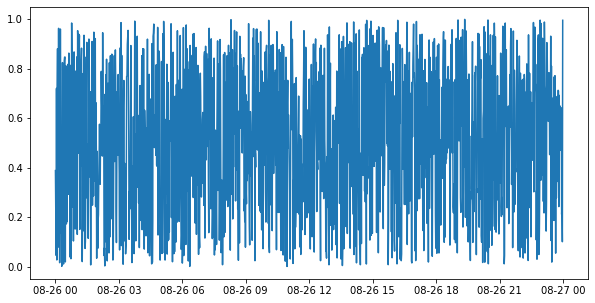

In [153]:
plt.figure(figsize=(10,5))
plt.plot(ts['Valor'])
plt.show()


### 2) Graficar una serie de tiempo de los ejemplos del repositorio: 

In [106]:
ts2 = pd.read_csv('datasets/TECO2.2000.2021.csv', index_col=1, parse_dates=['fechaHora'])

In [107]:
ts2.head()

,Unnamed: 0,ultimoPrecio
fechaHora,,
2021-06-29 17:00:01.710,0,185.40
2021-06-28 17:00:03.597,1,184.50
2021-06-25 17:00:02.383,2,190.60
2021-06-24 17:00:03.497,3,191.45
2021-06-23 17:00:03.290,4,193.45


In [108]:
ts2.drop(labels= 'Unnamed: 0', axis=1, inplace=True)

In [158]:
ts2.describe()

,ultimoPrecio
count,4840.000000
mean,43.035479
std,57.780953
min,0.381236
25%,5.150156
50%,12.641000
75%,49.804008
max,269.950000


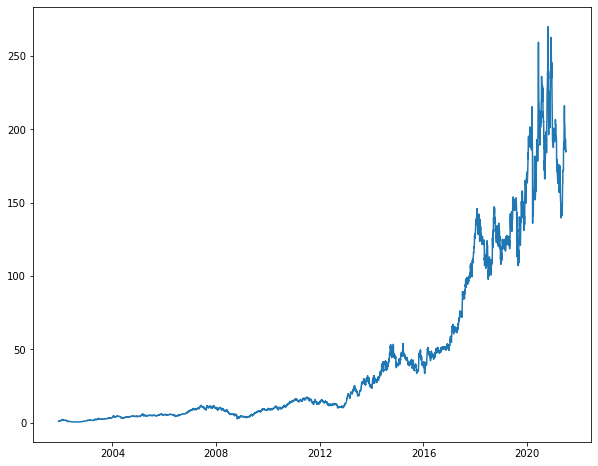

In [109]:
plt.figure(figsize=(10,8))
plt.plot(ts2['ultimoPrecio'])



La serie aprentemente describe el precio de "algo" a lo largo de los años. La curva muestra una tendencia creciente, arranca muy lento durante los primeros años, y a partir del 2012 aprox. empieza a acelerarse muy rápidamente. El mínimo es un valor muy pequeño cercano a cero, y el máximo aprox 270. Los picos mas grandes ocurren en el 2020. No se ven ningún patron recurrente.

### 3) Redactar un informe describiendo tres series de tiempo distintas (máx. 3 páginas)

### Dataset #1

In [111]:
ts3 = pd.read_csv('datasets/daily-minimum-temperatures-in-me.csv')


In [112]:
ts3.head()

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


In [113]:
ts3.dtypes

Date                          object
Daily minimum temperatures    object
dtype: object

In [128]:
ts3.isnull().values.sum()

0

In [115]:
ts3['Daily minimum temperatures']=ts3['Daily minimum temperatures'].str.replace("?","")


/var/folders/9g/1rg076zs24z9q_glz2_80vsw0000gn/T/ipykernel_14566/951607853.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ts3['Daily minimum temperatures']=ts3['Daily minimum temperatures'].str.replace("?","")


In [116]:
ts3.describe()

,Date,Daily minimum temperatures
count,3650,3650
unique,3650,229
top,1/1/1981,10
freq,1,51


In [117]:
from datetime import datetime


ts3['Date']=ts3['Date'].astype('datetime64')
ts3['Daily minimum temperatures']=ts3['Daily minimum temperatures'].astype('float64', )
ts3.set_index(keys=['Date'], inplace=True)

In [156]:
ts3.describe()

,Daily minimum temperatures
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


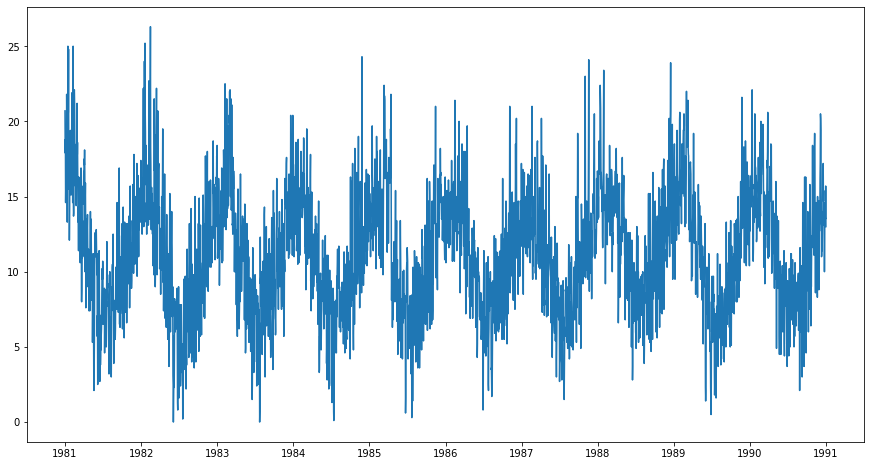

In [118]:
plt.figure(figsize=(15,8))
plt.plot(ts3['Daily minimum temperatures'])
plt.yscale('linear')

Descripción: Este dataset es de temperaturas mínimas registradas a lo largo de 10 años. Se ve un claro patrón que se repite anualmente, y la maginitud de los mismos se mantiene más o menos constante - los valores varían entre alrededor de cero (que serían los valores mínimos en invierno), y 23-25 grados que corresponde a las temperaturas mínimas en los meses de verano. La temperatura mínima promedio es de alrededor de 11 grados.

### Dataset #2

In [119]:
ts4 = pd.read_csv('datasets/monthly-beer-production-in-austr.csv')

In [120]:
ts4.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [121]:
ts4.dtypes

Month                       object
Monthly beer production    float64
dtype: object

In [122]:
ts4['Month'] = ts4['Month'].astype('datetime64')


In [123]:
ts4.dtypes

Month                      datetime64[ns]
Monthly beer production           float64
dtype: object

In [124]:
ts4.set_index(keys=['Month'], inplace=True)

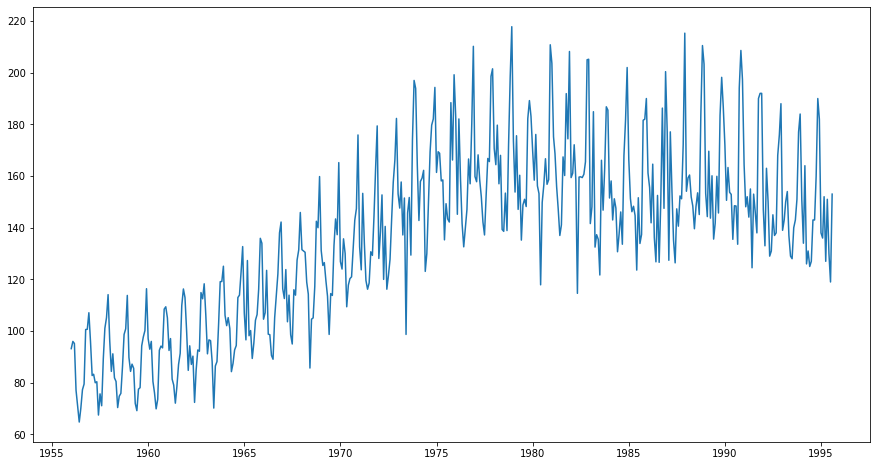

In [100]:
plt.figure(figsize=(15,8))
plt.plot(ts4['Monthly beer production'])

Descripción: Este dataset tiene información de producción mensual de cerveza en algún país. Se observa un patrón que se repite a intervalos regulares (anualmente). Se ve una tendencia creciente de los valores entre 1955 y 1980. A partir de 1980 se ve como una especie de valle hasta 1990 y a partir de entonces parece comenzar a decrecer. 
Para ese esquema anual que se repite, se ven una forma característica con 3 picos, y la diferencia entre los máximos y minimos de ese patrón anual se conserva más o menos constante hasta alrededor de 1970 y a partir de ahí comienza a crecer. 

### Dataset #3

In [125]:
ts5 = pd.read_csv('datasets/AirPassengers.csv')

In [126]:
ts5.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [134]:
ts5.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [135]:
ts5.dtypes

Month          object
#Passengers     int64
dtype: object

In [136]:
ts5['Month'] = ts5['Month'].astype('datetime64')

In [137]:
ts5.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [138]:
ts5.set_index(keys=['Month'], inplace=True)

In [159]:
ts5.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


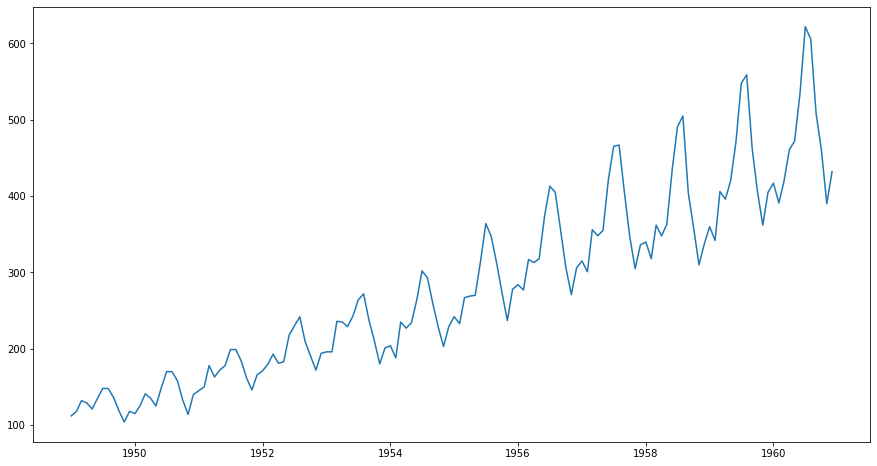

In [140]:
plt.figure(figsize=(15,8))
plt.plot(ts5['#Passengers'])

Descripción: Este dataset muestra cantidad de pasajeros que viajaron en avión (datos mensuales) entre 1950 y 1960 (no se especifican más datos como aerolínea o país). Se observa un patrón que se va repitiendo en forma anual, que muestra 3 picos marcados. Se ve una tendencia claramente creciente y también que las diferencias entre los valores máximos y los mínimos van aumentando su magnitud.